In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [3]:
tokenizer = Tokenizer()
data=open('D:\datasets\shakespeare.txt','r').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'to': 3, 'my': 4, 'of': 5, 'i': 6, 'in': 7, 'that': 8, 'thy': 9, 'thou': 10, 'with': 11, 'for': 12, 'is': 13, 'not': 14, 'love': 15, 'a': 16, 'me': 17, 'but': 18, 'thee': 19, 'so': 20, 'be': 21, 'as': 22, 'all': 23, 'you': 24, 'which': 25, 'his': 26, 'when': 27, 'it': 28, 'this': 29, 'by': 30, 'your': 31, 'doth': 32, 'do': 33, 'from': 34, 'on': 35, 'or': 36, 'no': 37, 'have': 38, 'then': 39, 'what': 40, 'are': 41, 'if': 42, 'more': 43, 'mine': 44, 'their': 45, 'shall': 46, 'sweet': 47, 'time': 48, 'will': 49, 'they': 50, 'eyes': 51, 'beauty': 52, 'nor': 53, 'art': 54, 'her': 55, 'yet': 56, 'heart': 57, 'o': 58, 'than': 59, 'self': 60, 'now': 61, 'should': 62, 'thine': 63, 'can': 64, 'make': 65, 'he': 66, 'one': 67, 'hath': 68, 'where': 69, 'fair': 70, 'still': 71, 'how': 72, 'him': 73, 'true': 74, 'eye': 75, 'like': 76, 'see': 77, 'am': 78, 'she': 79, 'those': 80, 'though': 81, 'being': 82, 'some': 83, 'such': 84, 'own': 85, 'every': 86, 'were': 87, 'dost': 88, 'wh

In [6]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [11]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=100)
print(model)


Epoch 1/100
484/484 [==============================] - 10s 21ms/step - loss: 6.7874 - accuracy: 0.03300s -
Epoch 2/100
484/484 [==============================] - 10s 21ms/step - loss: 6.0774 - accuracy: 0.0570
Epoch 3/100
484/484 [==============================] - 10s 20ms/step - loss: 5.3847 - accuracy: 0.0871
Epoch 4/100
484/484 [==============================] - 8s 18ms/step - loss: 4.5459 - accuracy: 0.1402
Epoch 5/100
484/484 [==============================] - 10s 20ms/step - loss: 3.7137 - accuracy: 0.2334
Epoch 6/100
484/484 [==============================] - 9s 19ms/step - loss: 3.0030 - accuracy: 0.3407
Epoch 7/100
484/484 [==============================] - 9s 18ms/step - loss: 2.4403 - accuracy: 0.4437
Epoch 8/100
484/484 [==============================] - 10s 20ms/step - loss: 2.0710 - accuracy: 0.5161
Epoch 9/100
484/484 [==============================] - 7s 15ms/step - loss: 1.8203 - accuracy: 0.5630
Epoch 10/100
484/484 [==============================] - 8s 16ms/step - lo

484/484 [==============================] - 12s 25ms/step - loss: 1.0651 - accuracy: 0.72280s - loss: 1.0543 - 
Epoch 79/100
484/484 [==============================] - 13s 26ms/step - loss: 1.0561 - accuracy: 0.7226
Epoch 80/100
484/484 [==============================] - 9s 19ms/step - loss: 1.0686 - accuracy: 0.7196 0s - loss: 1.0680 - accuracy: 0.
Epoch 81/100
484/484 [==============================] - 10s 20ms/step - loss: 1.0517 - accuracy: 0.7223
Epoch 82/100
484/484 [==============================] - 11s 22ms/step - loss: 1.0491 - accuracy: 0.7247
Epoch 83/100
484/484 [==============================] - 8s 17ms/step - loss: 1.0746 - accuracy: 0.7197
Epoch 84/100
484/484 [==============================] - 10s 21ms/step - loss: 1.0783 - accuracy: 0.7175
Epoch 85/100
484/484 [==============================] - 9s 19ms/step - loss: 1.0379 - accuracy: 0.7277
Epoch 86/100
484/484 [==============================] - 7s 15ms/step - loss: 1.0175 - accuracy: 0.7327 0s - loss:
Epoch 87/100
484/

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           335800    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_3 (Dense)              (None, 3358)              1010758   
Total params: 1,647,758
Trainable params: 1,647,758
Non-trainable params: 0
_________________________________________________________________


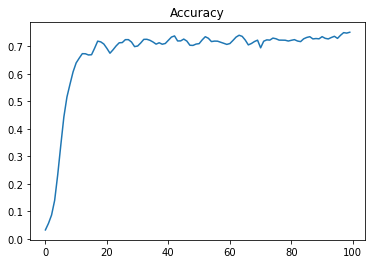

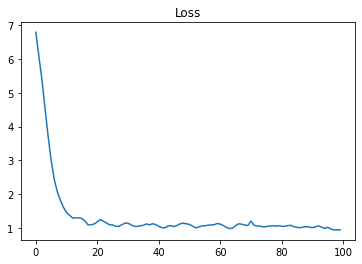

In [21]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.title("Accuracy")
plt.show()
plt.plot(history.history['loss'])
plt.title("Loss")
plt.show()

In [22]:
seed_text =input("Enter your text: ")
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

Enter your text: My name is Prithvi
My name is Prithvi 'will ' add her foot did strive hast arts apparel from me or your it things new ' for me ' varying and husband's faults ' me ' ' varying had men ' ' thine ' me ' thy dear heart ' ' ' ' ' varying had sighs ' me wide dun ' varying to you ' ' ' varying to me ' thy affairs fall ' ' ' for blessings strangle ' fall best ' ' ' ' me 'will' to torture me unset head ' ' ' varying and 'will' fall by elements night are decay'd '
